In [138]:
import numpy as np
import pandas as pd
import seaborn as s
from matplotlib.pyplot import axis, figure, savefig, subplots, plot, xlabel, ylabel
from matplotlib.transforms import Bbox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score

In [51]:
c = ["cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape","stalk_root","stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color","ring_number","ring_type","spore_print_color","population","habitat"]
df = pd.read_csv("agaricus-lepiota.csv", names = c)
df = df.reset_index()
df = df.rename(columns = {"index":"target"})
df.stalk_root[df.stalk_root == "?"] = "missing"

In [52]:
df.cap_shape[df.cap_shape == "b"] = "bell"
df.cap_shape[df.cap_shape == "c"] = "conical"
df.cap_shape[df.cap_shape == "x"] = "convex"
df.cap_shape[df.cap_shape == "f"] = "flat"
df.cap_shape[df.cap_shape == "k"] = "knobbed"
df.cap_shape[df.cap_shape == "s"] = "sunken"

df.cap_surface[df.cap_surface == "f"] = "fibrous"
df.cap_surface[df.cap_surface == "g"] = "grooves"
df.cap_surface[df.cap_surface == "y"] = "scaly"
df.cap_surface[df.cap_surface == "s"] = "smooth"

df.cap_color[df.cap_color == "n"] = "brown"
df.cap_color[df.cap_color == "b"] = "buff"
df.cap_color[df.cap_color == "c"] = "cinnamon"
df.cap_color[df.cap_color == "g"] = "gray"
df.cap_color[df.cap_color == "r"] = "green"
df.cap_color[df.cap_color == "p"] = "pink"
df.cap_color[df.cap_color == "u"] = "purple"
df.cap_color[df.cap_color == "e"] = "red"
df.cap_color[df.cap_color == "w"] = "white"
df.cap_color[df.cap_color == "y"] = "yellow"

df.bruises[df.bruises == "t"] = "true"
df.bruises[df.bruises == "f"] = "false"

df.odor[df.odor == "a"] = "almond"
df.odor[df.odor == "l"] = "anise"
df.odor[df.odor == "c"] = "creosote"
df.odor[df.odor == "y"] = "fishy"
df.odor[df.odor == "f"] = "foul"
df.odor[df.odor == "m"] = "musty"
df.odor[df.odor == "n"] = "none"
df.odor[df.odor == "p"] = "p"
df.odor[df.odor == "s"] = "spicy"

df.gill_attachment[df.gill_attachment == "a"] = "attached"
df.gill_attachment[df.gill_attachment == "d"] = "descending"
df.gill_attachment[df.gill_attachment == "f"] = "free"
df.gill_attachment[df.gill_attachment == "n"] = "notched"

df.gill_spacing[df.gill_spacing == "c"] = "close"
df.gill_spacing[df.gill_spacing == "w"] = "crowded"
df.gill_spacing[df.gill_spacing == "d"] = "distant"

df.gill_size[df.gill_size == "b"] = "broad"
df.gill_size[df.gill_size == "n"] = "narrow"

df.gill_color[df.gill_color == "k"] = "black"
df.gill_color[df.gill_color == "n"] = "brown"
df.gill_color[df.gill_color == "b"] = "buff"
df.gill_color[df.gill_color == "h"] = "chocolate"
df.gill_color[df.gill_color == "g"] = "gray"
df.gill_color[df.gill_color == "r"] = "green"
df.gill_color[df.gill_color == "o"] = "orange"
df.gill_color[df.gill_color == "p"] = "pink"
df.gill_color[df.gill_color == "u"] = "purple"
df.gill_color[df.gill_color == "e"] = "red"
df.gill_color[df.gill_color == "w"] = "white"
df.gill_color[df.gill_color == "y"] = "yellow"

In [53]:
Y = df.target
Y[Y == "e"] = 1
Y[Y == "p"] = 0
Y = Y.astype(int)
X = pd.get_dummies(df.drop("target", axis = 1))

In [54]:
Y.sum()

4208

1.0
1.0
1.0
1.0
Accuracy:  1.0
Recall:    1.0
Precision: 1.0


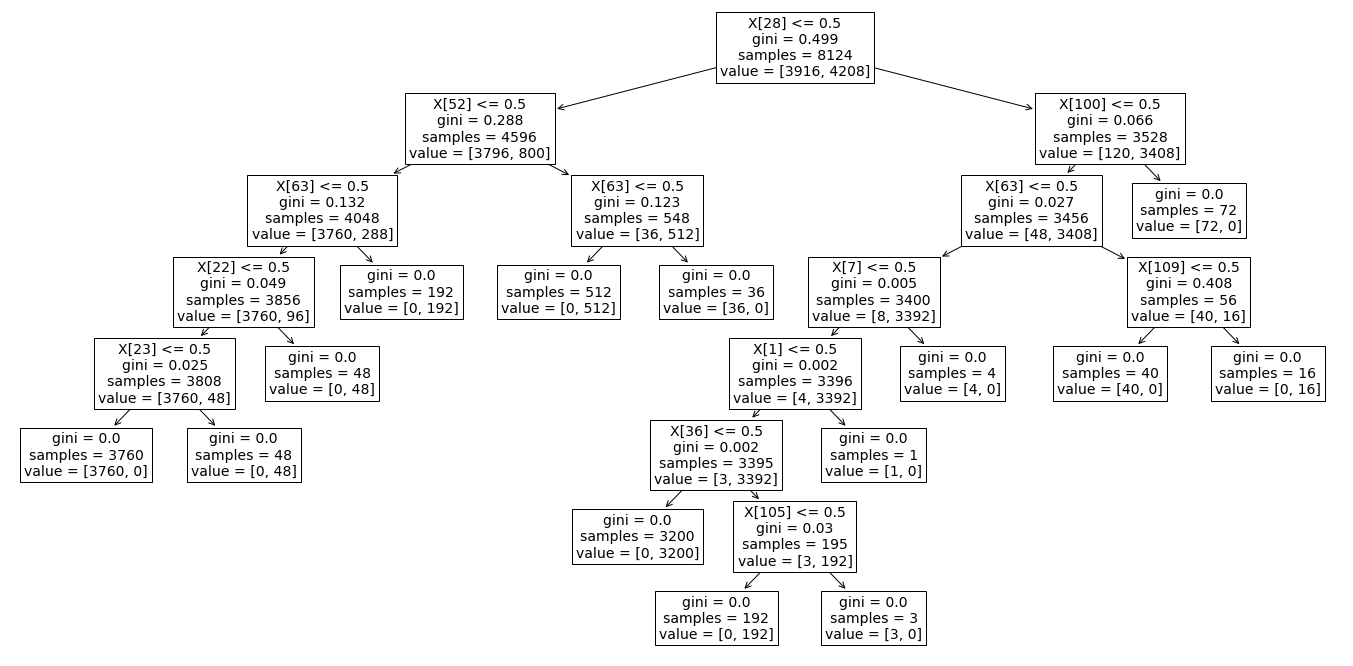

In [55]:
#First Model: Split based on Gini Index, no hyperparameter tuning, 
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best")
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall", "precision"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())
print(metrics["test_precision"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy:  " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:    " + str(recall_score(tree.predict(X),Y)))
print("Precision: " + str(precision_score(tree.predict(X),Y)))

1.0
1.0
1.0
1.0
Accuracy:  1.0
Recall:    1.0
Precision: 1.0


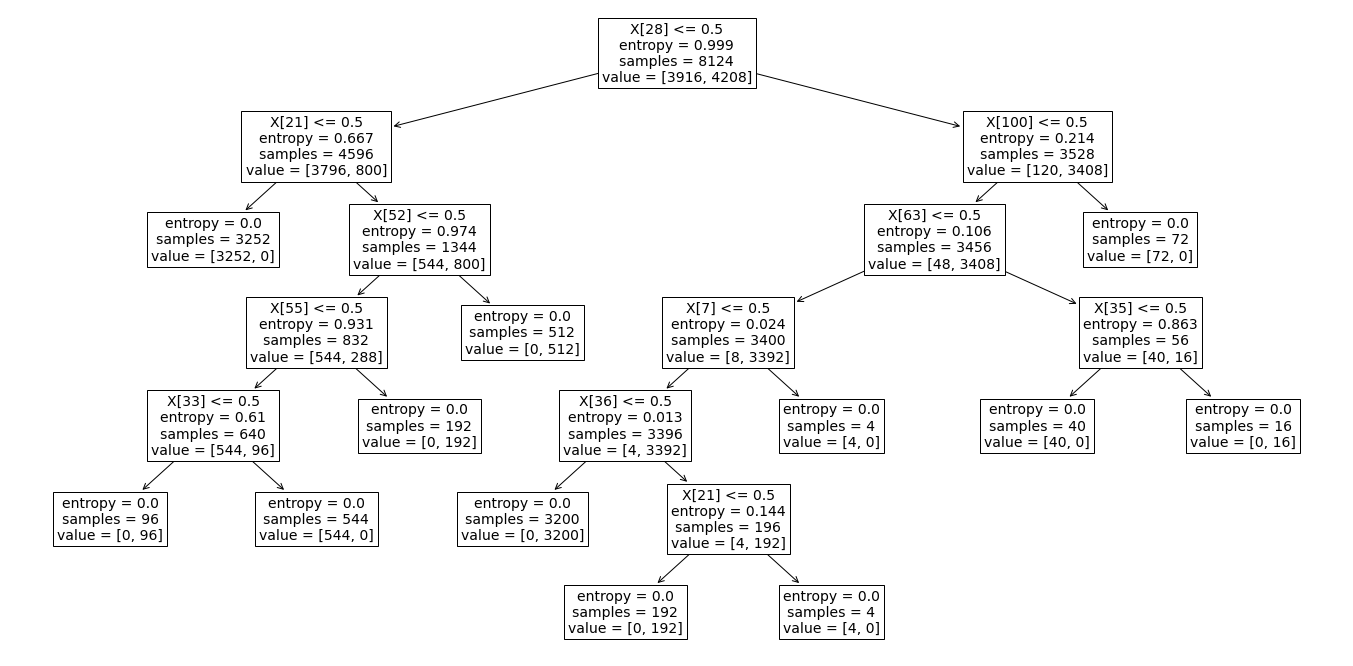

In [56]:
#Second Model: Split based on Entropy, no hyperparameter tuning
tree = DecisionTreeClassifier(criterion = "entropy",splitter = "best")
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall", "precision"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())
print(metrics["test_precision"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy:  " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:    " + str(recall_score(tree.predict(X),Y)))
print("Precision: " + str(precision_score(tree.predict(X),Y)))

0.9438335895232447
0.9762854227936681
0.939985330625141
0.9740048671032661
Accuracy:  0.9615952732644018
Recall:    0.9979550102249489
Precision: 0.9277566539923955


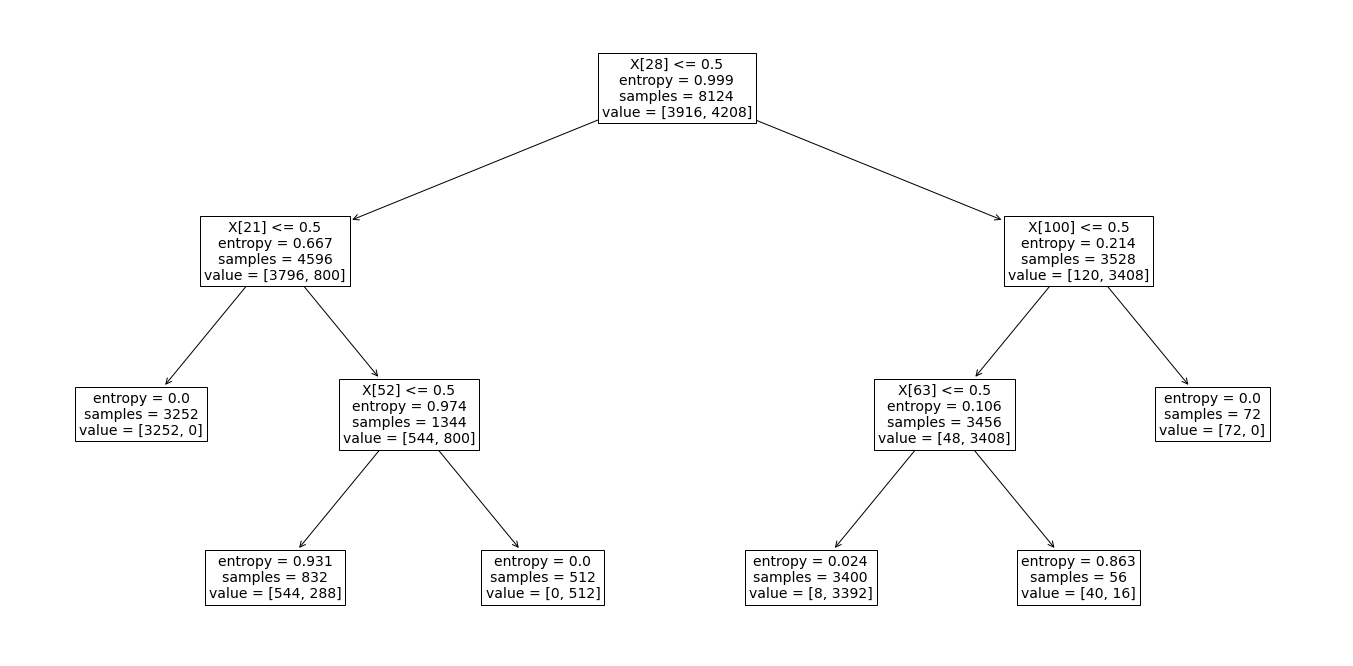

In [57]:
#Third Model: Split based on entropy, limit depth to 3
tree = DecisionTreeClassifier(criterion = "entropy",splitter = "best", max_depth = 3)
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall", "precision"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())
print(metrics["test_precision"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy:  " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:    " + str(recall_score(tree.predict(X),Y)))
print("Precision: " + str(precision_score(tree.predict(X),Y)))

0.9456433594364629
0.9699676661717236
0.978178740690589
0.9485778469520278
Accuracy:  0.9852289512555391
Recall:    0.9980506822612085
Precision: 0.973384030418251


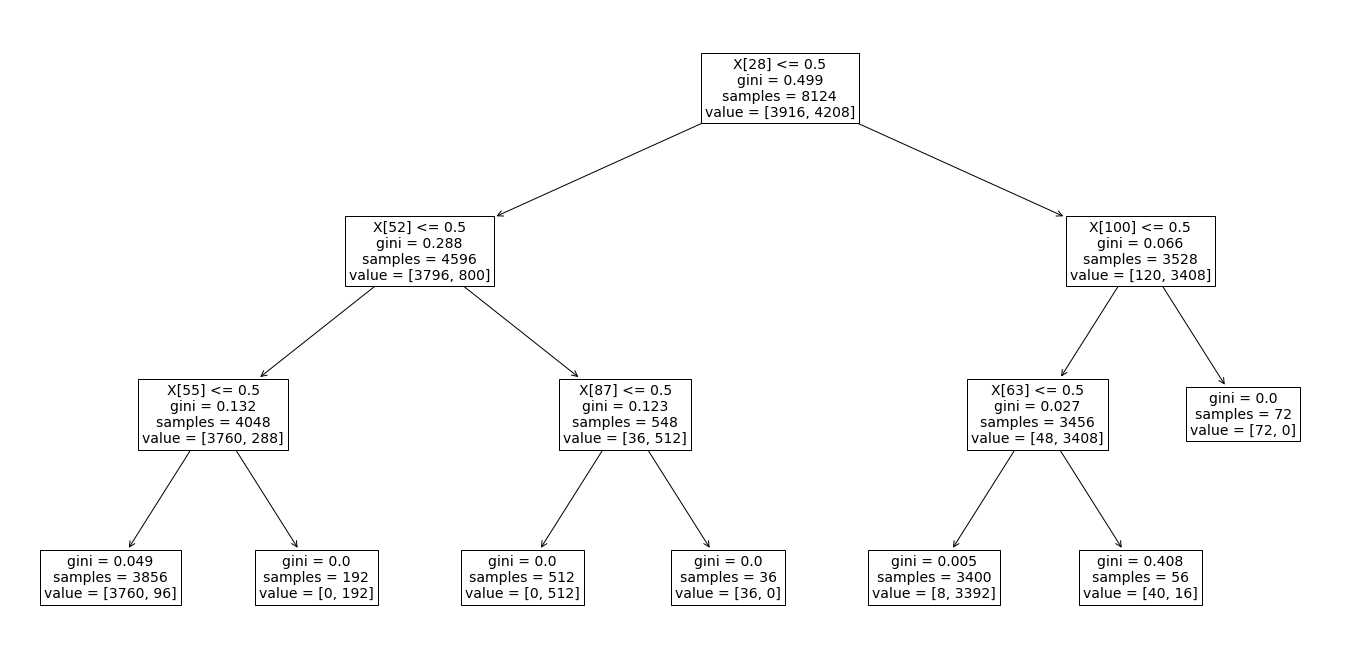

In [58]:
#Fourth Model: Split based on Gini Index, limit depth to 3
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best", max_depth = 3)
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall", "precision"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())
print(metrics["test_precision"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy:  " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:    " + str(recall_score(tree.predict(X),Y)))
print("Precision: " + str(precision_score(tree.predict(X),Y)))

From our previous models, we can tell that Gini Index is preferred, at is achieves higher recall after a significant number of nodes are removed. Next, we perform a grid search cross-validation to find the best possible alpha for cost-complexity pruning based on recall. First, a grid search is performed on powers of 10, and then again to fine-tune the model.

In [110]:
alpha = {"ccp_alpha": [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best", max_depth = 5)
#First, we use ROC to prevent the model from being needlessly penalized past perfect recall
search = GridSearchCV(tree, param_grid = alpha, scoring = "roc_auc", cv = 20)
search.fit(X,Y)

print(search.best_score_)
print(search.best_params_)

0.9995274538386785
{'ccp_alpha': 1e-05}


C:\Users\salba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'AUC')

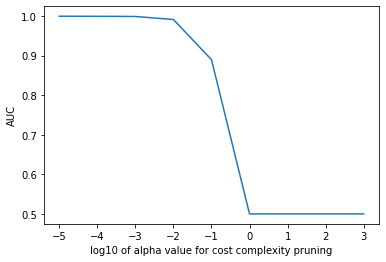

In [125]:
plot(np.log10(alpha["ccp_alpha"]),search.cv_results_["mean_test_score"])
xlabel("log10 of alpha value for cost complexity pruning")
ylabel("AUC")

In [131]:
alpha = {"ccp_alpha": [0.000005,0.00001,0.000015,0.00002,0.000025]}
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best", max_depth = 5)
#This time, we use recall to ensure that predicting edibility is prioritized - ensures safety
search = GridSearchCV(tree, param_grid = alpha, scoring = "recall", cv = 20)
search.fit(X,Y)

print(search.best_score_)
print(search.best_params_)
best = search.best_estimator_

0.9997619047619046
{'ccp_alpha': 5e-06}


Text(0, 0.5, 'Recall')

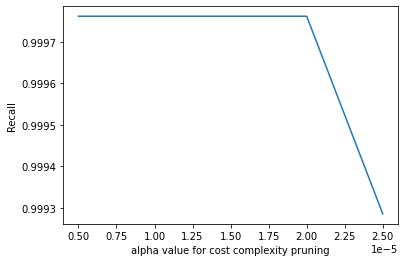

In [130]:
plot(alpha["ccp_alpha"],search.cv_results_["mean_test_score"])
xlabel("alpha value for cost complexity pruning")
ylabel("Recall")

Accuracy: 0.9966765140324964
Recall:   0.9992834965369
Precision:   0.9942965779467681


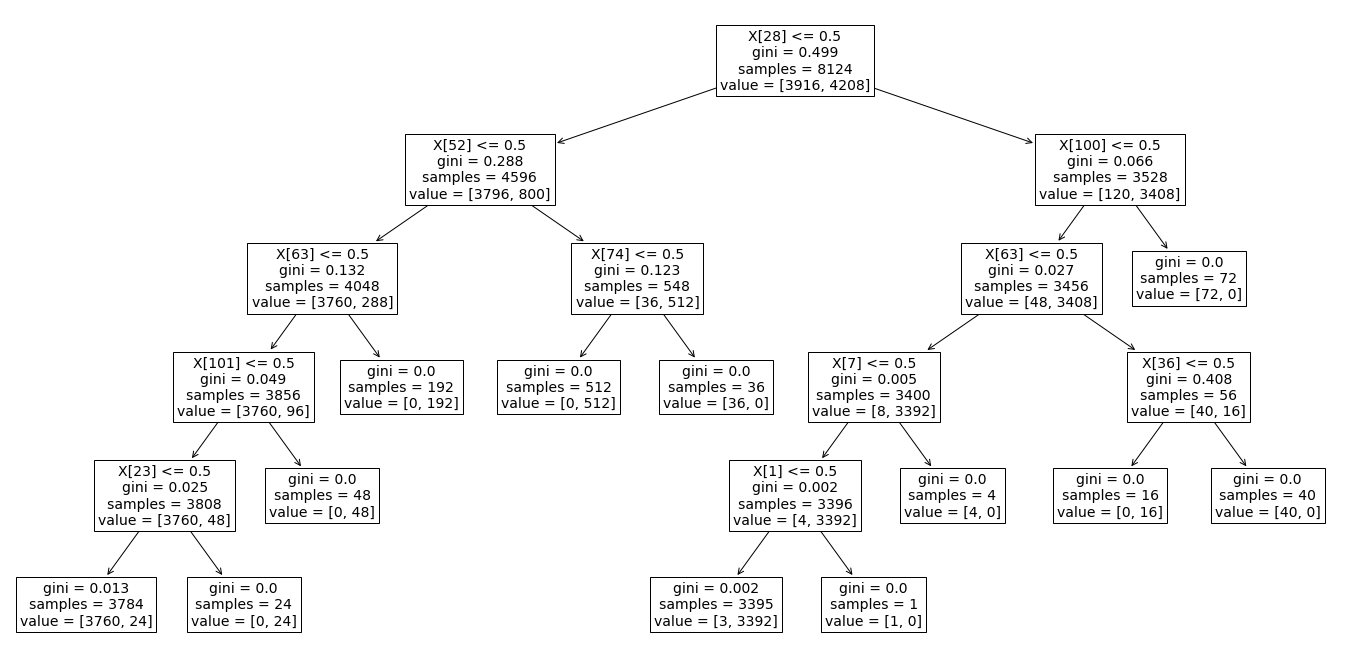

In [71]:
best.fit(X, Y)

fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(best, fontsize = 14)
print("Accuracy: " + str(accuracy_score(best.predict(X),Y)))
print("Recall:   " + str(recall_score(best.predict(X),Y)))
print("Precision:   " + str(precision_score(best.predict(X),Y)))

In [70]:
confusion_matrix(tree.predict(X), Y)

array([[3913,    0],
       [   3, 4208]], dtype=int64)

In [76]:
for n, column in enumerate(X.columns.values):
    print("Attribute %d: %s"%(n,column))

Attribute 0: cap_shape_bell
Attribute 1: cap_shape_conical
Attribute 2: cap_shape_convex
Attribute 3: cap_shape_flat
Attribute 4: cap_shape_knobbed
Attribute 5: cap_shape_sunken
Attribute 6: cap_surface_fibrous
Attribute 7: cap_surface_grooves
Attribute 8: cap_surface_scaly
Attribute 9: cap_surface_smooth
Attribute 10: cap_color_brown
Attribute 11: cap_color_buff
Attribute 12: cap_color_cinnamon
Attribute 13: cap_color_gray
Attribute 14: cap_color_green
Attribute 15: cap_color_pink
Attribute 16: cap_color_purple
Attribute 17: cap_color_red
Attribute 18: cap_color_white
Attribute 19: cap_color_yellow
Attribute 20: bruises_false
Attribute 21: bruises_true
Attribute 22: odor_almond
Attribute 23: odor_anise
Attribute 24: odor_creosote
Attribute 25: odor_fishy
Attribute 26: odor_foul
Attribute 27: odor_musty
Attribute 28: odor_none
Attribute 29: odor_p
Attribute 30: odor_spicy
Attribute 31: gill_attachment_attached
Attribute 32: gill_attachment_free
Attribute 33: gill_spacing_close
Attribut

The above decision tree is accurate, but who can really tell if a mushroom smells "musty"? Below, we use random forest to try to find a number of other decision trees that are simpler.

In [82]:
rf = RandomForestClassifier(n_estimators = 5, criterion = "gini", max_depth = 5, max_features = "sqrt" )
metrics = cross_validate(rf, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall"])

print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())

rf.fit(X,Y)

0.9879392043185146
0.9999770172117595
0.9954976303317536


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
alpha = {"ccp_alpha": [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}
rf = RandomForestClassifier(n_estimators = 5, criterion = "gini", max_depth = 5, max_features = "sqrt" )
#first, use AUC to prevent penalization when recall is already perfect
search = GridSearchCV(rf, param_grid = alpha, scoring = "roc_auc", cv = 20)
search.fit(X,Y)

print(search.best_score_)
print(search.best_params_)

0.9998970783303166
{'ccp_alpha': 0.0001}


C:\Users\salba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'AUC')

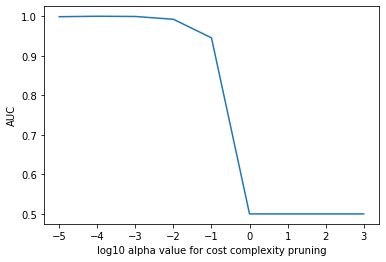

In [135]:
plot(np.log10(alpha["ccp_alpha"]),search.cv_results_["mean_test_score"])
xlabel("log10 alpha value for cost complexity pruning")
ylabel("AUC")

In [85]:
alpha = {"ccp_alpha": [0.000005, 0.00001, 0.000015, 0.00002]}
rf = RandomForestClassifier(n_estimators = 5, criterion = "gini", max_depth = 5, max_features = "sqrt" )
search = GridSearchCV(rf, param_grid = alpha, scoring = "recall", cv = 20)
search.fit(X,Y)

print(search.best_score_)
print(search.best_params_)
best = search.best_estimator_

0.9954919882645001
{'ccp_alpha': 5e-06}


In [87]:
for n,tree in enumerate(best.estimators_):
    metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall"])
    print("Scores for tree %d"%(n+1))
    print(metrics["test_accuracy"].mean())
    print(metrics["test_roc_auc"].mean())
    print(metrics["test_recall"].mean())

Scores for tree 1
0.9268215707870879
0.9600128086883938
0.9755833897540057
Scores for tree 2
0.9545987097711237
0.9796404468641265
0.9947867298578199
Scores for tree 3
0.9103257646361096
0.9599341906441239
0.9786729857819905
Scores for tree 4
0.9143123418985487
0.9833543086262158
0.8785432182351613
Scores for tree 5
0.9597892787547959
0.9928168193479152
0.9691548183254344


Accuracy: 0.9350073855243722
Recall:   0.9020979020979021


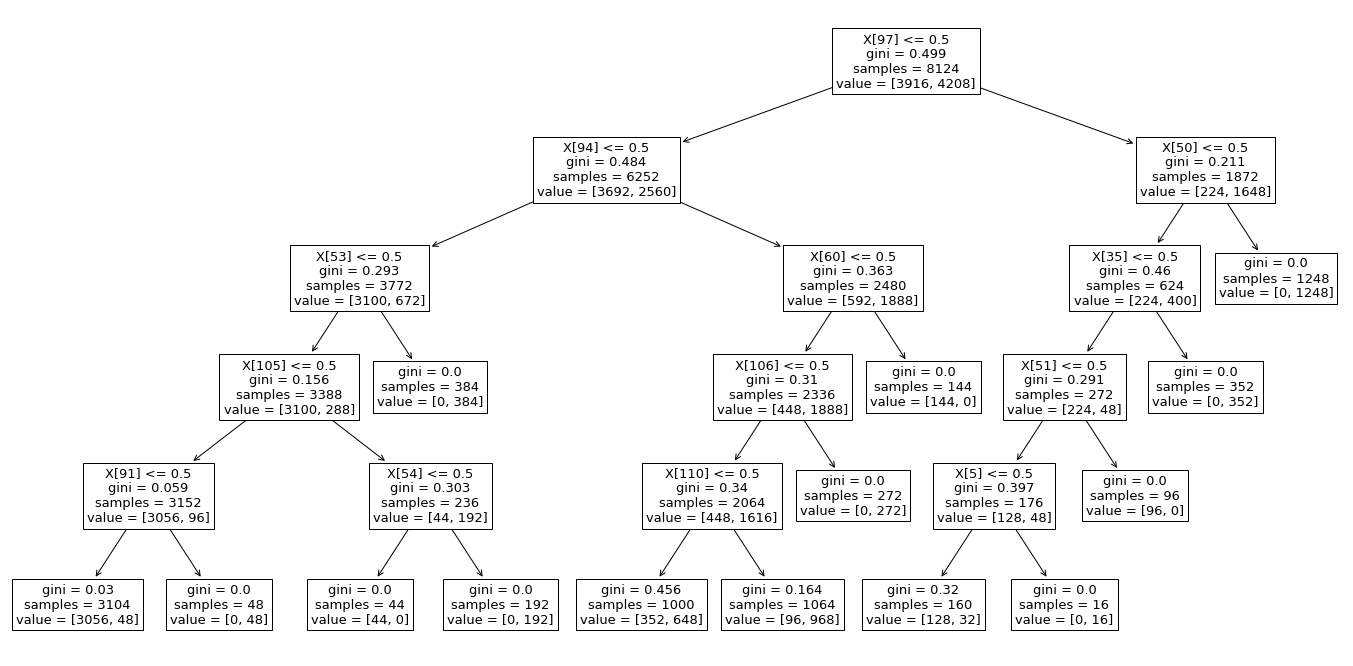

In [88]:
alt1 = best.estimators_[0].fit(X,Y)

fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(alt1, fontsize = 13)
print("Accuracy: " + str(accuracy_score(alt1.predict(X),Y)))
print("Recall:   " + str(recall_score(alt1.predict(X),Y)))

In [104]:
96 / (96 + 968)

0.09022556390977443

In [81]:
for n, column in enumerate(X.columns.values):
    print("Attribute %d: %s"%(n,column))

Attribute 0: cap_shape_bell
Attribute 1: cap_shape_conical
Attribute 2: cap_shape_convex
Attribute 3: cap_shape_flat
Attribute 4: cap_shape_knobbed
Attribute 5: cap_shape_sunken
Attribute 6: cap_surface_fibrous
Attribute 7: cap_surface_grooves
Attribute 8: cap_surface_scaly
Attribute 9: cap_surface_smooth
Attribute 10: cap_color_brown
Attribute 11: cap_color_buff
Attribute 12: cap_color_cinnamon
Attribute 13: cap_color_gray
Attribute 14: cap_color_green
Attribute 15: cap_color_pink
Attribute 16: cap_color_purple
Attribute 17: cap_color_red
Attribute 18: cap_color_white
Attribute 19: cap_color_yellow
Attribute 20: bruises_false
Attribute 21: bruises_true
Attribute 22: odor_almond
Attribute 23: odor_anise
Attribute 24: odor_creosote
Attribute 25: odor_fishy
Attribute 26: odor_foul
Attribute 27: odor_musty
Attribute 28: odor_none
Attribute 29: odor_p
Attribute 30: odor_spicy
Attribute 31: gill_attachment_attached
Attribute 32: gill_attachment_free
Attribute 33: gill_spacing_close
Attribut

Accuracy: 0.9689807976366323
Recall:   0.9872340425531915


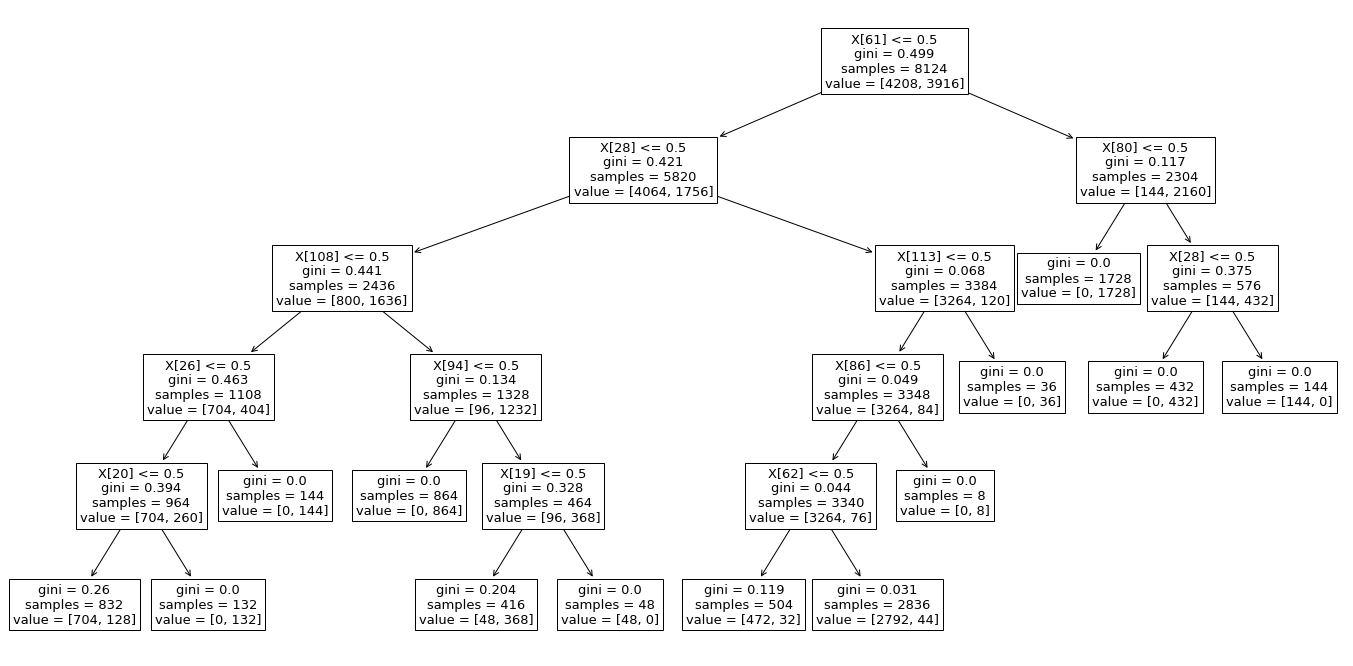

In [106]:
alt2 = best.estimators_[1].fit(X,Y)

fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(alt2, fontsize = 13)
print("Accuracy: " + str(accuracy_score(alt2.predict(X),Y)))
print("Recall:   " + str(recall_score(alt2.predict(X),Y)))

Accuracy: 0.9689807976366323
Recall:   0.9872340425531915


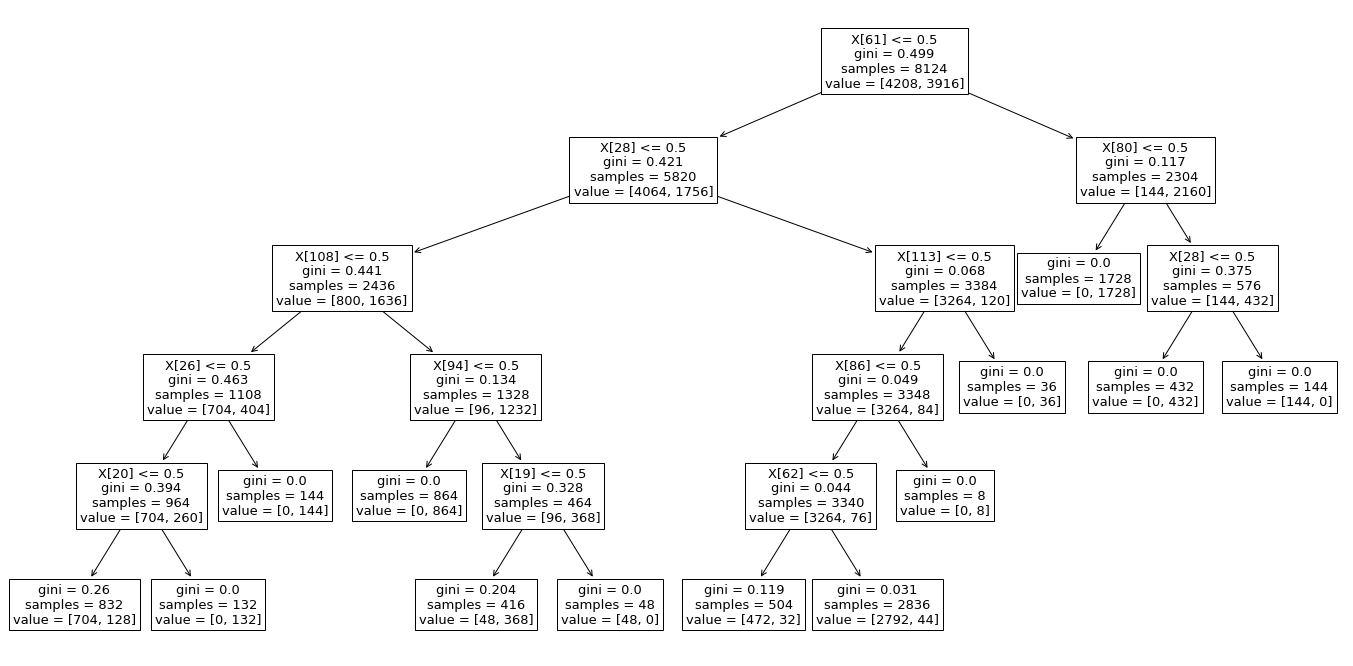

In [107]:
alt3 = best.estimators_[1].fit(X,Y)

fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(alt2, fontsize = 13)
print("Accuracy: " + str(accuracy_score(alt3.predict(X),Y)))
print("Recall:   " + str(recall_score(alt3.predict(X),Y)))

In [139]:
print("Accuracy: " + str(accuracy_score(best.predict(X),Y)))
print("Recall:   " + str(recall_score(best.predict(X),Y)))
print("AUC:      " + str(roc_auc_score(best.predict(X),Y)))

Accuracy: 0.9966765140324964
Recall:   0.9992834965369
AUC:      0.9965937421724378
